In [9]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# STEP 2: Load datasets (update file paths or upload via Colab)
trades = pd.read_csv('/content/historical_data.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')

In [12]:
# STEP 3: Basic checks
print("Trader Data Columns:", trades.columns.tolist())
print("Sentiment Data Columns:", sentiment.columns.tolist())
print("\nSample trader data:\n", trades.head())
print("\nSample sentiment data:\n", sentiment.head())

Trader Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Data Columns: ['timestamp', 'value', 'classification', 'date']

Sample trader data:
                                       Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       1

In [13]:
# STEP 4: Clean and prepare timestamp/date columns
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['Trade_Date'] = trades['Timestamp IST'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['Date'] = sentiment['date'].dt.date

In [14]:

# STEP 5: Merge on common date
merged = pd.merge(trades, sentiment, left_on='Trade_Date', right_on='Date', how='left')

# Drop rows where sentiment is missing
merged.dropna(subset=['classification'], inplace=True)

# Preview merged data
print("\n✅ Merged dataset ready:")
print(merged[['Account', 'Coin', 'Size USD', 'Closed PnL', 'classification']].head())


✅ Merged dataset ready:
                                      Account  Coin  Size USD  Closed PnL  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   7872.16         0.0   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107    127.68         0.0   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   1150.63         0.0   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   1142.04         0.0   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107     69.75         0.0   

  classification  
0          Greed  
1          Greed  
2          Greed  
3          Greed  
4          Greed  


In [15]:
# STEP 6: ANALYSIS
# ---------------------------------------------------------

# 🧩 Profitability vs Market Sentiment
profitability = merged.groupby('classification')['Closed PnL'].mean().reset_index()

# 💰 Volume vs Market Sentiment
volume = merged.groupby('classification')['Size USD'].sum().reset_index()

# ⚖️ Risk (average trade size) vs Market Sentiment
risk = merged.groupby('classification')['Size Tokens'].mean().reset_index()

# ⚡ Leverage (if not available, we’ll simulate a proxy using Size USD / Size Tokens)
merged['Leverage_proxy'] = merged['Size USD'] / merged['Size Tokens']
leverage = merged.groupby('classification')['Leverage_proxy'].mean().reset_index()

/tmp/ipython-input-1942882634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profitability, x='classification', y='Closed PnL', palette='coolwarm')
/tmp/ipython-input-1942882634.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume, x='classification', y='Size USD', palette='viridis')
/tmp/ipython-input-1942882634.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk, x='classification', y='Size Tokens', palette='magma')
/tmp/ipython-input-1942882634.py:30: FutureWarning: 

Passing `palette` without assigning `h

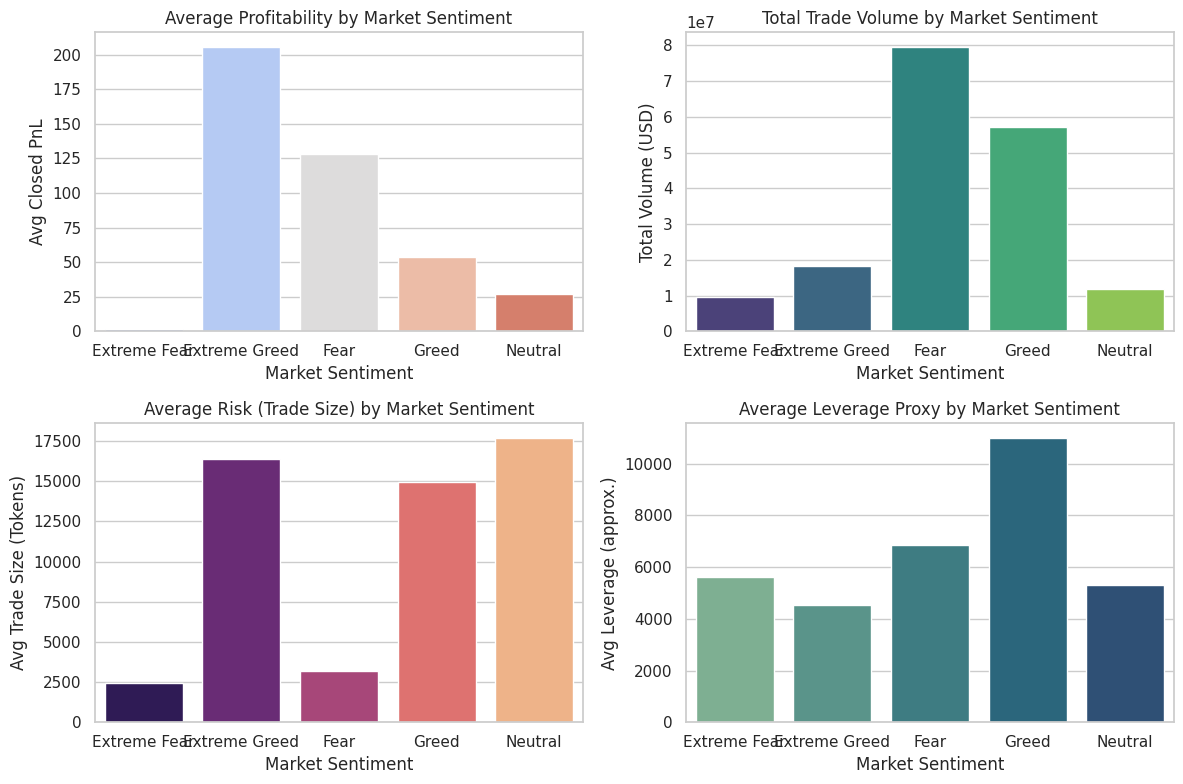

In [16]:
# ---------------------------------------------------------
# STEP 7: VISUALIZATION
# ---------------------------------------------------------

plt.figure(figsize=(12,8))

# Profitability
plt.subplot(2,2,1)
sns.barplot(data=profitability, x='classification', y='Closed PnL', palette='coolwarm')
plt.title('Average Profitability by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Closed PnL')

# Volume
plt.subplot(2,2,2)
sns.barplot(data=volume, x='classification', y='Size USD', palette='viridis')
plt.title('Total Trade Volume by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Volume (USD)')

# Risk
plt.subplot(2,2,3)
sns.barplot(data=risk, x='classification', y='Size Tokens', palette='magma')
plt.title('Average Risk (Trade Size) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Trade Size (Tokens)')

# Leverage
plt.subplot(2,2,4)
sns.barplot(data=leverage, x='classification', y='Leverage_proxy', palette='crest')
plt.title('Average Leverage Proxy by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Leverage (approx.)')

plt.tight_layout()
plt.show()

In [17]:
# ---------------------------------------------------------
# STEP 8: INSIGHT SUMMARY
# ---------------------------------------------------------
print("\n📊 INSIGHT SUMMARY:")

for sentiment_class in merged['classification'].unique():
    subset = merged[merged['classification'] == sentiment_class]
    print(f"\n➡ Sentiment: {sentiment_class}")
    print(f"   Avg Profitability: {subset['Closed PnL'].mean():.4f}")
    print(f"   Avg Volume (USD): {subset['Size USD'].mean():.2f}")
    print(f"   Avg Risk (Tokens): {subset['Size Tokens'].mean():.2f}")
    print(f"   Avg Leverage Proxy: {subset['Leverage_proxy'].mean():.2f}")

print("\n✅ Analysis complete! Visuals show how trader behavior shifts with Fear vs Greed conditions.")


📊 INSIGHT SUMMARY:

➡ Sentiment: Greed
   Avg Profitability: 53.9880
   Avg Volume (USD): 5051.88
   Avg Risk (Tokens): 14956.26
   Avg Leverage Proxy: 11004.57

➡ Sentiment: Extreme Greed
   Avg Profitability: 205.8163
   Avg Volume (USD): 3242.09
   Avg Risk (Tokens): 16407.31
   Avg Leverage Proxy: 4545.58

➡ Sentiment: Fear
   Avg Profitability: 128.2880
   Avg Volume (USD): 5744.78
   Avg Risk (Tokens): 3219.87
   Avg Leverage Proxy: 6846.51

➡ Sentiment: Extreme Fear
   Avg Profitability: 1.8916
   Avg Volume (USD): 4118.76
   Avg Risk (Tokens): 2460.04
   Avg Leverage Proxy: 5604.21

➡ Sentiment: Neutral
   Avg Profitability: 27.0888
   Avg Volume (USD): 4332.20
   Avg Risk (Tokens): 17720.85
   Avg Leverage Proxy: 5309.51

✅ Analysis complete! Visuals show how trader behavior shifts with Fear vs Greed conditions.
